# MODULE 18-2: Simple Linear Regression Using OLS Model

## Review Houseprices
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
house_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

## Summary Statistics

In [5]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_df['bsmtfullbath']

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: bsmtfullbath, Length: 1460, dtype: int64

In [7]:
house_df['centralair']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: centralair, Length: 1460, dtype: object

In [4]:
house_df['street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: street, Length: 1460, dtype: object

## Target Variable: 'SalePrice'
Look at target variable for distribution, and how skewness.

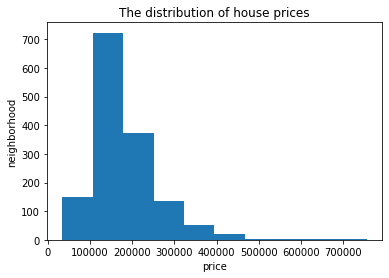

In [8]:
%matplotlib inline

plt.hist(house_df.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("price")
plt.ylabel("neighborhood")
plt.show()

We see that the data are skewed towards the lower price end.

In [18]:
#house_df["is_rlzone"] = pd.get_dummies(house_df.mszoning, drop_first=True)
house_df["is_centralair"] = pd.get_dummies(house_df.centralair, drop_first=True)

house_df["is_normal"] = pd.get_dummies(house_df.salecondition, drop_first=True)

ValueError: Wrong number of items passed 5, placement implies 1

In [11]:
house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,is_centralair
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,None,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,None,None,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,4,2008,WD,Abnorml,129900,1
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,1,2008,WD,Normal,118000,1


KeyError: 'is_normal'

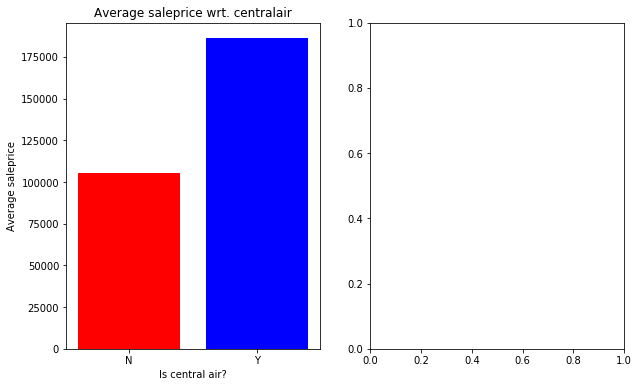

In [12]:
plt.figure(figsize=(10,6))

#plt.subplot(1,2,1)
#plt.bar(house_df.groupby("mszoning")["saleprice"].mean().index, house_df.groupby("is_rlzone")["saleprice"].mean(),
 #      color=("purple","blue"))
#plt.title("Average saleprice wrt. zoning")
#plt.ylabel("Average saleprice")
#plt.xlabel("Is RL Zone?")
#plt.xticks([0,1])

plt.subplot(1,2,1)
plt.bar(house_df.groupby("centralair")["saleprice"].mean().index, house_df.groupby("is_centralair")["saleprice"].mean(),
       color=("red","blue"))
plt.title("Average saleprice wrt. centralair")
plt.ylabel("Average saleprice")
plt.xlabel("Is central air?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(house_df.groupby("salecondition")["saleprice"].mean().index, house_df.groupby("is_normal")["saleprice"].mean(),
       color=("pink","green"))
plt.title("Average saleprice wrt. sale condition ")
plt.ylabel("Average saleprice")
plt.xlabel("Is normal?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [13]:
# Y is the target variable
Y = house_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house_df[['is_centralair','is_normal']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

KeyError: "['is_normal'] not in index"

In [ ]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()